In [1]:
import soundfile as sf
data1,samplerate = sf.read('/Users/hyh/Desktop/Test Files/Postfiltered/postfiltered_2020-01-08_09_25_03_2.raw', 
               channels=4, 
               samplerate=16000,
               subtype='PCM_16'
              )
data2,samplerate = sf.read('/Users/hyh/Desktop/Test Files/Postfiltered/postfiltered_2020-01-08_09_25_03_3.raw', 
               channels=4, 
               samplerate=16000,
               subtype='PCM_16'
              )

In [3]:
from scipy import signal
corr1 = signal.correlate(data1[:,0],data1[:,0],method='fft')/len(data1[:,0])

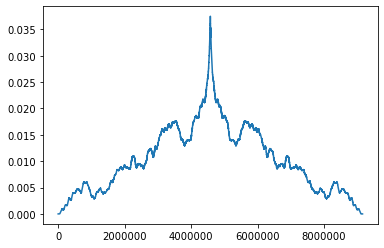

In [5]:
import matplotlib.pyplot as plt
plt.plot(corr)
# clock = np.arange(64, len(sig), 128)
# fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
# ax_orig.plot(sig)
# ax_orig.plot(clock, sig[clock], 'ro')
# ax_orig.set_title('Original signal')
# ax_noise.plot(sig_noise)
# ax_noise.set_title('Signal with noise')
# ax_corr.plot(corr)
# ax_corr.plot(clock, corr[clock], 'ro')
# ax_corr.axhline(0.5, ls=':')
# ax_corr.set_title('Cross-correlated with rectangular pulse')
# ax_orig.margins(0, 0.1)
# fig.tight_layout()
plt.show()

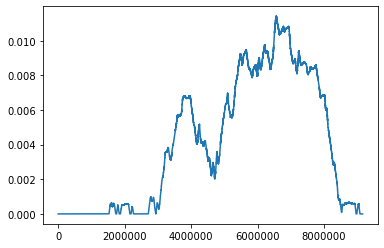

In [6]:
corr2 = signal.correlate(data1[:,0],data1[:,1],method='fft')/len(data1[:,0])
plt.plot(corr2)
plt.show()

# phat transform
# FFT then normalize the magnitude to 1
# Do cross correlation with 1 second window of signals (Try different time windows)
# Mean, std of the overall signal, check how significant the peak is, (peak-mean)/std, expected more than 2 at least
